# 🚗 **Vehicle Market Segmentation – Clustering Analysis**
**Machine Learning | Unsupervised Learning**

**Author:** Nadia Rozman  
**Date:** January 2026  

## **Project Overview**

This project applies **unsupervised machine learning clustering techniques** to segment vehicles in the automotive market based on technical specifications.

**Business Context**

An automobile manufacturer is designing new vehicle prototypes and needs to:
- Identify which existing vehicles are most similar to new designs
- Understand natural market segments based on vehicle specifications
- Support competitive positioning and product strategy decisions

**Objective**
- Discover **natural vehicle segments** using clustering
- Compare **Hierarchical Clustering** and **K-Means**
- Identify the **optimal number of clusters**
- Translate clustering results into **business insights**

### **Import libraries**

In [58]:
# Standard libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Machine Learning - Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Machine Learning - Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans

# Machine Learning - Evaluation
from sklearn.metrics import silhouette_score

# Configuration
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### **Load and Explore Data**

In [ ]:
# Load the vehicle specification dataset
df = pd.read_csv('ML_Clustering_Vehicle_Market_Segmentation/data/vehicle_specifications.csv')

In [60]:
# Display first few rows to understand data structure
df.head()

# Display dataset information (data types, non-null counts, memory usage)
df.info()

# Display statistical summary (mean, std, min, max, quartiles)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   156 non-null    object 
 1   model      156 non-null    object 
 2   sales      156 non-null    float64
 3   resale     156 non-null    float64
 4   type       156 non-null    int64  
 5   price      156 non-null    float64
 6   engine_s   156 non-null    float64
 7   horsepow   156 non-null    int64  
 8   wheelbas   156 non-null    float64
 9   width      156 non-null    float64
 10  length     156 non-null    float64
 11  curb_wgt   156 non-null    float64
 12  fuel_cap   156 non-null    float64
 13  mpg        156 non-null    float64
 14  lnsales    156 non-null    float64
 15  partition  156 non-null    int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 19.6+ KB


,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0
mean,52.994987,17.368519,0.256410,27.432801,3.060897,185.948718,107.487179,71.150000,187.343590,3.380538,17.951923,23.800641,3.291468,0.0
std,68.248508,10.784874,0.438057,14.314919,1.044653,56.700321,7.641303,3.451872,13.431754,0.629248,3.887921,4.281129,1.321317,0.0
min,0.110000,0.900000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,-2.207000,0.0
25%,14.035000,10.970000,0.000000,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,2.641500,0.0
50%,29.213000,14.095000,0.000000,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,3.374500,0.0
75%,68.069750,19.878750,1.000000,32.253750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,4.220750,0.0
max,540.561000,58.600000,1.000000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,6.293000,0.0


### **Feature Selection**

In [61]:
# Define features for clustering (technical specifications only)
features = ['engine_s', 'horsepow', 'wheelbas', 'width', 'length',
            'curb_wgt', 'fuel_cap', 'mpg']

# Create feature dataframe
X = df[features].copy()

print(f"Selected {len(features)} features for clustering:")
for i, feat in enumerate(features, 1):
    print(f"   {i}. {feat}")

print(f"Feature Matrix Shape: {X.shape}")

Selected 8 features for clustering:
   1. engine_s
   2. horsepow
   3. wheelbas
   4. width
   5. length
   6. curb_wgt
   7. fuel_cap
   8. mpg
Feature Matrix Shape: (156, 8)


In [62]:
# Verify no missing values in selected features
print(f"Missing Values in Features: {X.isnull().sum().sum()}")

Missing Values in Features: 0


### **Feature Scaling - Normalization**
*Clustering algorithms rely on distance calculations, so features are normalized to ensure no single variable dominates due to scale.*

In [63]:
# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Convert back to dataframe for easier viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\nScaled Data Sample:")
print(X_scaled_df.head())

print("\nScaled Data Statistics:")
print(X_scaled_df.describe())


Scaled Data Sample:
   engine_s  horsepow  wheelbas     width    length  curb_wgt  fuel_cap  \
0  0.114286  0.215190  0.186551  0.271676  0.306258  0.202339  0.133641   
1  0.314286  0.430380  0.336226  0.445087  0.579228  0.441120  0.317972   
2  0.314286  0.430380  0.310195  0.462428  0.567244  0.428338  0.317972   
3  0.357143  0.392405  0.477223  0.508671  0.628495  0.531683  0.354839   
4  0.114286  0.240506  0.216920  0.323699  0.380826  0.299973  0.281106   

        mpg  
0  0.433333  
1  0.333333  
2  0.366667  
3  0.233333  
4  0.400000  

Scaled Data Statistics:
         engine_s    horsepow    wheelbas       width      length    curb_wgt  \
count  156.000000  156.000000  156.000000  156.000000  156.000000  156.000000   
mean     0.294414    0.331516    0.322932    0.494220    0.505241    0.404008   
std      0.149236    0.143545    0.165755    0.199530    0.178852    0.171131   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.185

### **Hierarchical Clustering - Dendrogram Analysis**


🌳 Generating Ward Linkage Dendrogram...


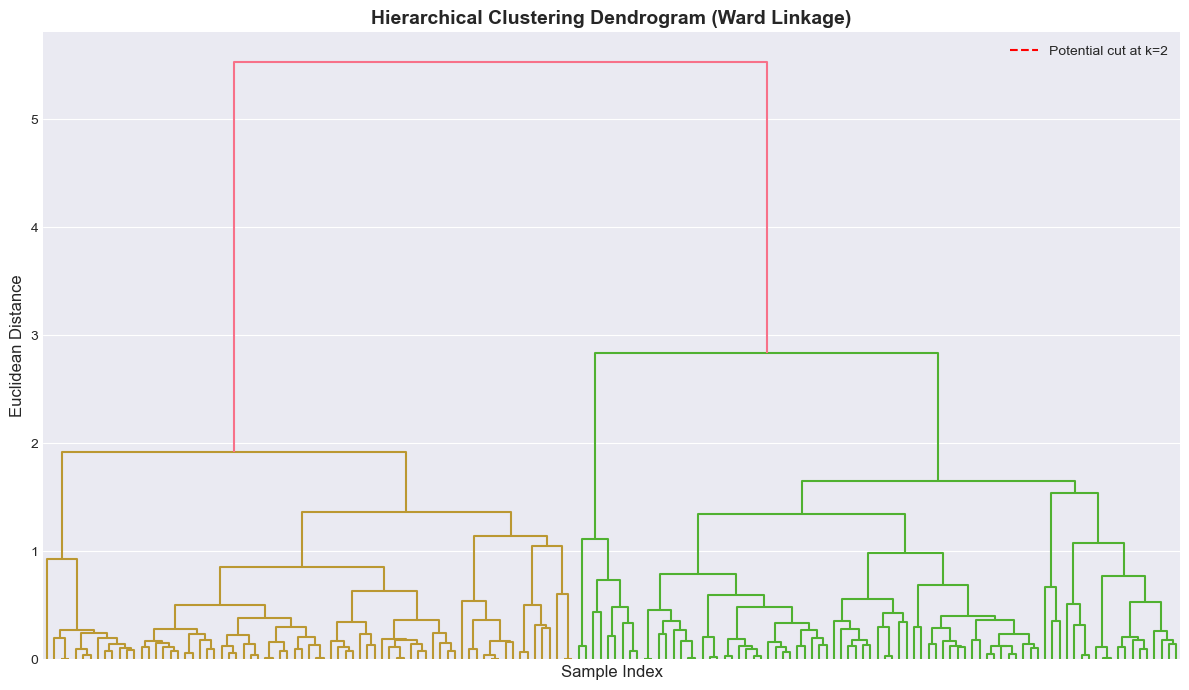

✅ Ward Linkage: Minimizes within-cluster variance

🌳 Generating Complete Linkage Dendrogram...


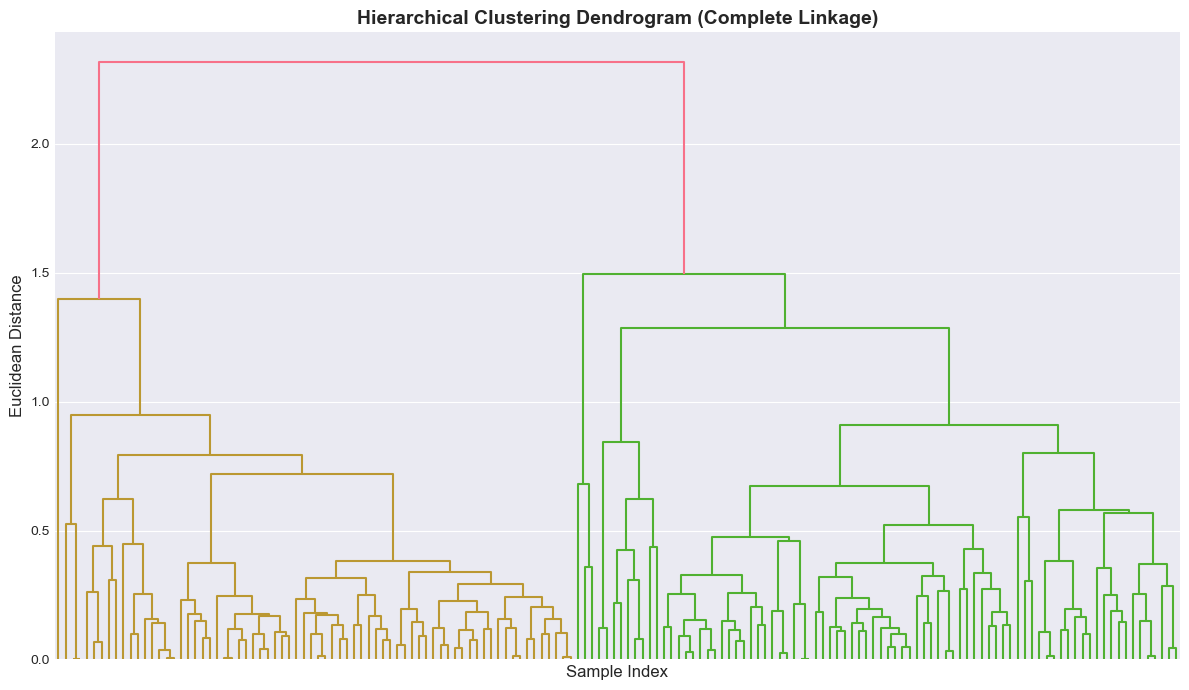

✅ Complete Linkage: Minimizes maximum distance between clusters

🌳 Generating Average Linkage Dendrogram...


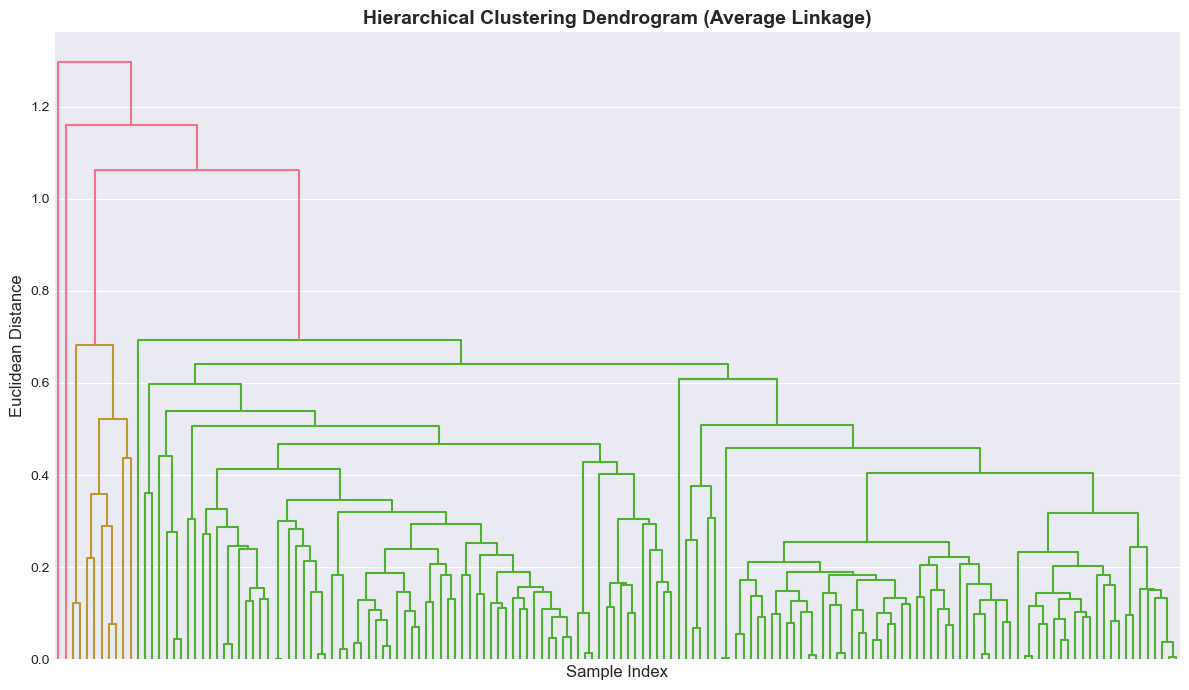

✅ Average Linkage: Minimizes average distance between all pairs


In [ ]:
# 1 Ward Linkage Dendrogram
print("\n🌳 Generating Ward Linkage Dendrogram...")
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward', metric='euclidean'),
    no_labels=True
)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.axhline(y=6, color='r', linestyle='--', label='Potential cut at k=2')
plt.legend()
plt.tight_layout()
plt.savefig('images/1_dendrogram_ward.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Ward Linkage: Minimizes within-cluster variance")

# 2 Complete Linkage Dendrogram
print("\n🌳 Generating Complete Linkage Dendrogram...")
plt.figure(figsize=(12, 7))
sch.dendrogram(
    sch.linkage(X_scaled, method='complete', metric='euclidean'),
    no_labels=True
)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.tight_layout()
plt.savefig('images/2_dendrogram_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Complete Linkage: Minimizes maximum distance between clusters")

# 3 Average Linkage Dendrogram
print("\n🌳 Generating Average Linkage Dendrogram...")
plt.figure(figsize=(12, 7))
sch.dendrogram(
    sch.linkage(X_scaled, method='average', metric='euclidean'),
    no_labels=True
)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.tight_layout()
plt.savefig('images/3_dendrogram_average.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Average Linkage: Minimizes average distance between all pairs")

**Hierarchical Clustering - Model Fitting**

In [66]:
# Test different numbers of clusters
n_clusters_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
linkage_methods = ['ward', 'complete', 'average']

# Store results
hierarchical_results = []

for linkage in linkage_methods:
    print(f"\n🔗 {linkage.upper()} LINKAGE")
    print("-" * 50)
    
    for n_clusters in n_clusters_list:
        # Create model
        if linkage == 'ward':
            model = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage='ward',
                metric='euclidean'
            )
        else:
            model = AgglomerativeClustering(
                n_clusters=n_clusters,
                linkage=linkage,
                metric='euclidean'
            )
        
        # Fit and predict
        labels = model.fit_predict(X_scaled)
        
        # Calculate silhouette score
        score = silhouette_score(X_scaled, labels)
        
        # Store results
        hierarchical_results.append({
            'linkage': linkage,
            'n_clusters': n_clusters,
            'silhouette_score': score,
            'cluster_distribution': np.bincount(labels).tolist()
        })
        
        print(f"  k={n_clusters:2d} | Silhouette: {score:.4f} | "
              f"Distribution: {np.bincount(labels)}")

# Convert to DataFrame
results_df = pd.DataFrame(hierarchical_results)

# Find best configuration for each linkage
print("\n" + "="*70)
print("BEST CONFIGURATIONS BY LINKAGE METHOD")
print("="*70)

for linkage in linkage_methods:
    subset = results_df[results_df['linkage'] == linkage]
    best = subset.loc[subset['silhouette_score'].idxmax()]
    print(f"\n{linkage.upper()} Linkage:")
    print(f"  Best k: {int(best['n_clusters'])}")
    print(f"  Best Silhouette Score: {best['silhouette_score']:.4f}")
    print(f"  Cluster Distribution: {best['cluster_distribution']}")


🔗 WARD LINKAGE
--------------------------------------------------
  k= 2 | Silhouette: 0.3663 | Distribution: [83 73]
  k= 3 | Silhouette: 0.3550 | Distribution: [73 74  9]
  k= 4 | Silhouette: 0.2753 | Distribution: [74 60  9 13]
  k= 5 | Silhouette: 0.2386 | Distribution: [19 60  9 13 55]
  k= 6 | Silhouette: 0.2387 | Distribution: [60 55  9 13 16  3]
  k= 7 | Silhouette: 0.2501 | Distribution: [55 16  9 13 16  3 44]
  k= 8 | Silhouette: 0.2466 | Distribution: [16 16  9 13 29  3 44 26]
  k= 9 | Silhouette: 0.2593 | Distribution: [ 9 16  8 13 29  3 44 26  8]
  k=10 | Silhouette: 0.2695 | Distribution: [16 29  8 13  7  3 44 26  8  2]

🔗 COMPLETE LINKAGE
--------------------------------------------------
  k= 2 | Silhouette: 0.3637 | Distribution: [84 72]
  k= 3 | Silhouette: 0.3443 | Distribution: [72 81  3]
  k= 4 | Silhouette: 0.3287 | Distribution: [81 71  3  1]
  k= 5 | Silhouette: 0.3432 | Distribution: [71 72  3  1  9]
  k= 6 | Silhouette: 0.3208 | Distribution: [72  9  3  1 68 

> **⚠️ Note:** Although Average Linkage achieved the highest silhouette score, the resulting clusters are highly imbalanced, indicating a dominant group and a potential outlier cluster.  
> This imbalance suggests that, despite strong numerical performance, the segmentation may be less actionable for market strategy and product differentiation.

**Hierarchical Clustering - Visualization**


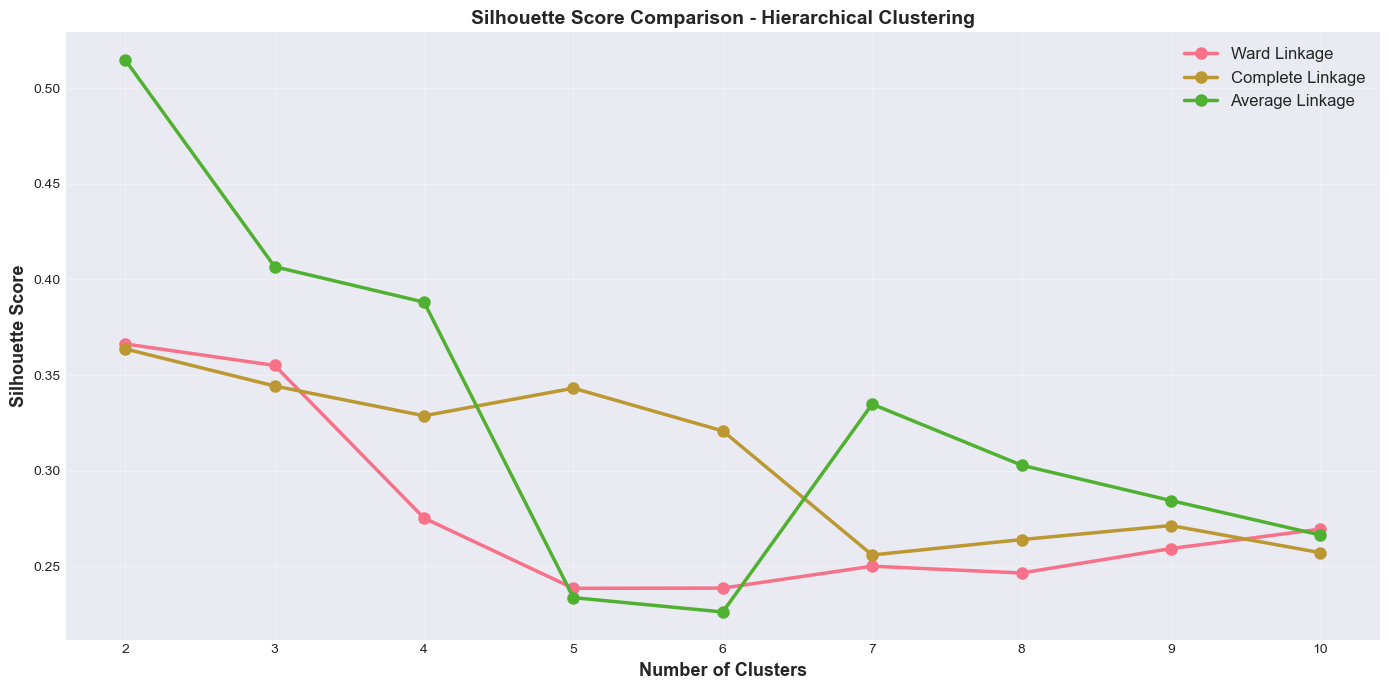

🏆 OVERALL BEST CONFIGURATION:
   Linkage: AVERAGE
   Clusters: 2
   Silhouette Score: 0.5147


In [ ]:
plt.figure(figsize=(14, 7))

for linkage in linkage_methods:
    subset = results_df[results_df['linkage'] == linkage]
    plt.plot(subset['n_clusters'], 
             subset['silhouette_score'],
             marker='o',
             linewidth=2.5,
             markersize=8,
             label=f'{linkage.capitalize()} Linkage')

plt.xlabel('Number of Clusters', fontsize=13, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=13, fontweight='bold')
plt.title('Silhouette Score Comparison - Hierarchical Clustering', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(n_clusters_list)
plt.tight_layout()
plt.savefig('images/4_hierarchical_silhouette.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify overall best configuration
best_config = results_df.loc[results_df['silhouette_score'].idxmax()]
print(f"🏆 OVERALL BEST CONFIGURATION:")
print(f"   Linkage: {best_config['linkage'].upper()}")
print(f"   Clusters: {int(best_config['n_clusters'])}")
print(f"   Silhouette Score: {best_config['silhouette_score']:.4f}")

### **K-Means Clustering - Optimal K Selection**

In [68]:
# Test different k values
k_range = range(2, 11)
kmeans_results = {}


for k in k_range:
    # Create and fit model
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        random_state=42,
        n_init=10
    )
    
    # Fit and predict
    kmeans_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate metrics
    sil_score = silhouette_score(X_scaled, kmeans_labels)
    inertia = kmeans.inertia_
    
    # Store results
    kmeans_results[k] = {
        'model': kmeans,
        'labels': kmeans_labels,
        'silhouette_score': sil_score,
        'inertia': inertia,
        'cluster_distribution': np.bincount(kmeans_labels).tolist()
    }
    
    print(f"k={k:2d} | Silhouette: {sil_score:.4f} | "
          f"Inertia: {inertia:6.2f} | "
          f"Distribution: {np.bincount(kmeans_labels)}")

k= 2 | Silhouette: 0.3666 | Inertia:  19.40 | Distribution: [73 83]
k= 3 | Silhouette: 0.3215 | Inertia:  15.07 | Distribution: [70 21 65]
k= 4 | Silhouette: 0.2573 | Inertia:  12.95 | Distribution: [24 21 63 48]
k= 5 | Silhouette: 0.2415 | Inertia:  11.51 | Distribution: [33 44  9 24 46]
k= 6 | Silhouette: 0.2489 | Inertia:  10.30 | Distribution: [42 22 40 24 19  9]
k= 7 | Silhouette: 0.2442 | Inertia:   9.58 | Distribution: [53 20 38  9 16  6 14]
k= 8 | Silhouette: 0.2483 | Inertia:   8.88 | Distribution: [26 31  3 22  3 44 21  6]
k= 9 | Silhouette: 0.2597 | Inertia:   8.12 | Distribution: [38 16 14 15 18  6  2 40  7]
k=10 | Silhouette: 0.2808 | Inertia:   7.47 | Distribution: [16 22  7  6 16 10 42 32  2  3]


**K-Means Clustering - Elbow and Silhouette Plots**

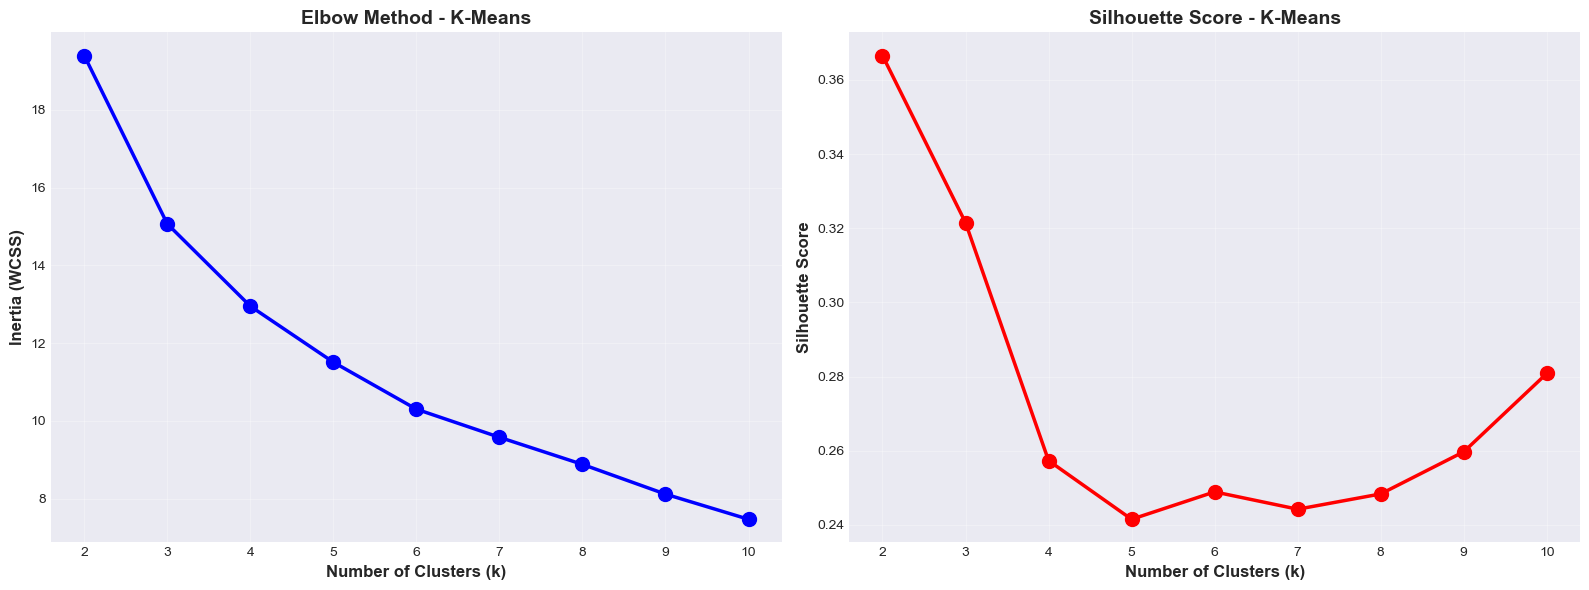


OPTIMAL K-MEANS CONFIGURATION:
   Clusters: 2
   Silhouette Score: 0.3666
   Inertia: 19.40


In [ ]:
# Prepare data for plotting
clusters = list(kmeans_results.keys())
inertias = [kmeans_results[k]['inertia'] for k in clusters]
scores = [kmeans_results[k]['silhouette_score'] for k in clusters]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Elbow Method
axes[0].plot(clusters, inertias, 'bo-', linewidth=2.5, markersize=10)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method - K-Means', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(clusters)

# Plot 2: Silhouette Score
axes[1].plot(clusters, scores, 'ro-', linewidth=2.5, markersize=10)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('Silhouette Score - K-Means', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(clusters)

plt.tight_layout()
plt.savefig('images/5_kmeans_elbow_silhouette.png', dpi=300, bbox_inches='tight')
plt.show()

# Find optimal k
optimal_k = clusters[scores.index(max(scores))]
print(f"\nOPTIMAL K-MEANS CONFIGURATION:")
print(f"   Clusters: {optimal_k}")
print(f"   Silhouette Score: {max(scores):.4f}")
print(f"   Inertia: {kmeans_results[optimal_k]['inertia']:.2f}")


**Fitting Final K-Means Model**

In [70]:
# Use optimal k
print(f"Using k={optimal_k} clusters (highest silhouette score)")

# Fit final model
kmeans_final = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    random_state=42,
    n_init=10
)

y_kmeans = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster_KMeans'] = y_kmeans

print(f"\nFinal model fitted successfully")
print(f"\nFinal Metrics:")
print(f"   Silhouette Score: {kmeans_results[optimal_k]['silhouette_score']:.4f}")
print(f"   Inertia: {kmeans_results[optimal_k]['inertia']:.2f}")
print(f"   Cluster Distribution: {np.bincount(y_kmeans)}")


Using k=2 clusters (highest silhouette score)

Final model fitted successfully

Final Metrics:
   Silhouette Score: 0.3666
   Inertia: 19.40
   Cluster Distribution: [73 83]


**K-Means Clustering - Visualization**

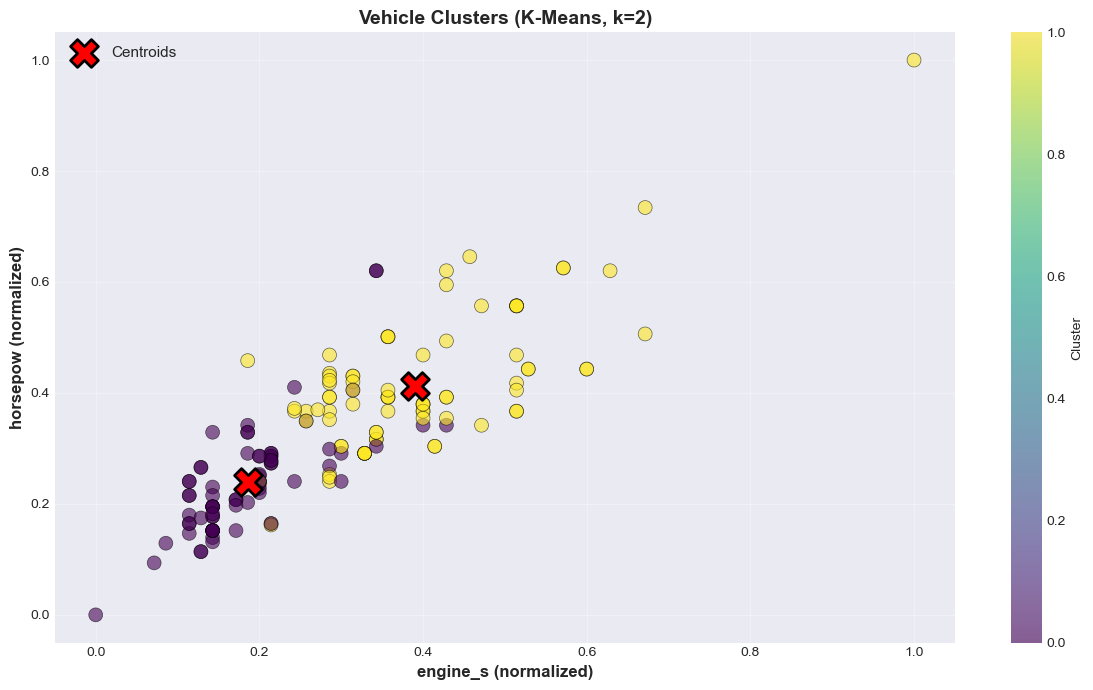

   Note: Visualization is 2D; clustering was performed using all features
   Actual clustering uses all 8 features


In [ ]:
# Create scatter plot (using first 2 features for 2D visualization)
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=y_kmeans,
    cmap='viridis',
    s=100,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

# Plot centroids
centroids = kmeans_final.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=400,
    c='red',
    marker='X',
    edgecolors='black',
    linewidth=2,
    label='Centroids'
)

plt.xlabel(f'{features[0]} (normalized)', fontsize=12, fontweight='bold')
plt.ylabel(f'{features[1]} (normalized)', fontsize=12, fontweight='bold')
plt.title(f'Vehicle Clusters (K-Means, k={optimal_k})', 
          fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/6_kmeans_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("   Note: Visualization is 2D; clustering was performed using all features")
print("   Actual clustering uses all 8 features")

### **Cluster Analysis - Sample Data**

In [72]:
# Display sample vehicles from each cluster
print("🚗 Sample vehicles by cluster:")
print(df[['manufact', 'model'] + features + ['Cluster_KMeans']].head(15))

# Cluster statistics
print("\n📊 Cluster Statistics:")
cluster_stats = df.groupby('Cluster_KMeans')[features].mean()
print(cluster_stats)

🚗 Sample vehicles by cluster:
    manufact        model  engine_s  horsepow  wheelbas  width  length  \
0      Acura      Integra       1.8       140     101.2   67.3   172.4   
1      Acura           TL       3.2       225     108.1   70.3   192.9   
2      Acura           CL       3.2       225     106.9   70.6   192.0   
3      Acura           RL       3.5       210     114.6   71.4   196.6   
4       Audi           A4       1.8       150     102.6   68.2   178.0   
5       Audi           A6       2.8       200     108.7   76.1   192.0   
6       Audi           A8       4.2       310     113.0   74.0   198.2   
7        BMW         323i       2.5       170     107.3   68.4   176.0   
8        BMW         328i       2.8       193     107.3   68.5   176.0   
9        BMW         528i       2.8       193     111.4   70.9   188.0   
10     Buick      Century       3.1       175     109.0   72.7   194.6   
11     Buick        Regal       3.8       240     109.0   72.7   196.2   
12     B

### **Final Comparison - Hierarchical vs K-Means**

In [73]:
print("BEST CONFIGURATIONS:")
print("\n1. Hierarchical Clustering (Average Linkage):")
print(f"   Clusters: {int(best_config['n_clusters'])}")
print(f"   Silhouette Score: {best_config['silhouette_score']:.4f}")

print("\n2. K-Means Clustering:")
print(f"   Clusters: {optimal_k}")
print(f"   Silhouette Score: {kmeans_results[optimal_k]['silhouette_score']:.4f}")

if best_config['silhouette_score'] > kmeans_results[optimal_k]['silhouette_score']:
    winner = "Hierarchical Clustering (Average Linkage)"
    score_diff = best_config['silhouette_score'] - kmeans_results[optimal_k]['silhouette_score']
else:
    winner = "K-Means Clustering"
    score_diff = kmeans_results[optimal_k]['silhouette_score'] - best_config['silhouette_score']

print(f"\n🏆 Winner: {winner}")
print(f"   Performance advantage: {score_diff:.4f} higher silhouette score")

BEST CONFIGURATIONS:

1. Hierarchical Clustering (Average Linkage):
   Clusters: 2
   Silhouette Score: 0.5147

2. K-Means Clustering:
   Clusters: 2
   Silhouette Score: 0.3666

🏆 Winner: Hierarchical Clustering (Average Linkage)
   Performance advantage: 0.1481 higher silhouette score


### **Conclusion**

- Although K-Means achieved a lower silhouette score than hierarchical clustering, it produced more balanced and interpretable clusters.  
- This makes K-Means a strong candidate for practical use cases such as vehicle positioning, portfolio planning, and prototype comparison.